In [1]:
# Import the dataset from scikit learn datasets
from sklearn.datasets import fetch_openml;
mnist=fetch_openml("mnist_784",version=1)


c:\Users\Lakshya Batra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X=mnist["data"]
y=mnist['target']

import pandas as pd

# Convert numpy array to Pandas DataFrame
df = pd.DataFrame(data=X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df['target'] = y

# Data Visualisation and Preprocessing

In [95]:
# Check the data type of the frame, we find that the labels are catagorical objects
df.dtypes

pixel_0       float64
pixel_1       float64
pixel_2       float64
pixel_3       float64
pixel_4       float64
               ...   
pixel_780     float64
pixel_781     float64
pixel_782     float64
pixel_783     float64
target       category
Length: 785, dtype: object

In [16]:
# To convert the catagorical labels to integers , we use LabelEncoder from sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform y
y_encoded = label_encoder.fit_transform(y)
print(y)
y.dtype


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False, categories_dtype=object)

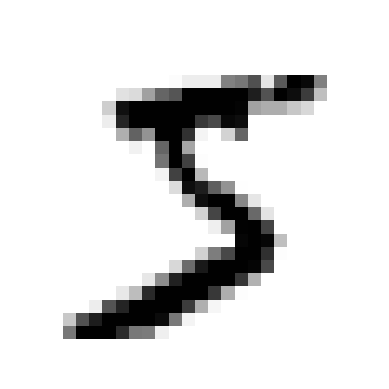

In [5]:
# Visualise a image from the dataframe, using matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0].values

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

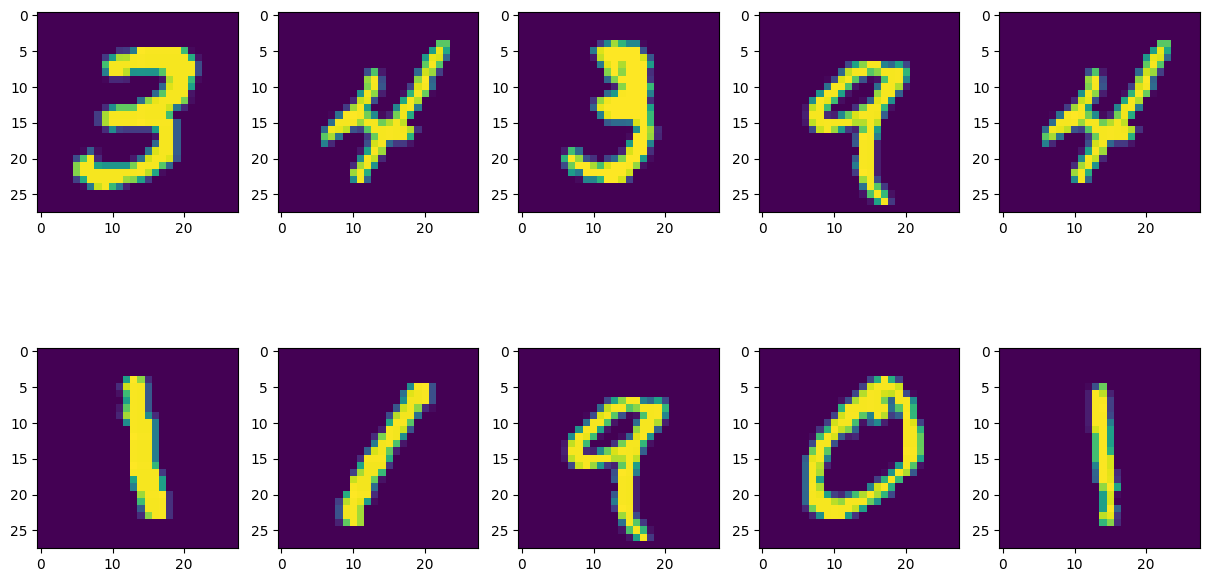

In [93]:
import random 
fig, axs = plt.subplots(2,5, figsize=(15,8))
axs= axs.flatten()
random_indices = [random.randint(1,10) for i in range(10)]
for axis, index in zip(axs,random_indices):
    random_image = X.iloc[index].values.reshape(28,28)
    axis.imshow(random_image)

plt.show()

Unique elements: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Counts: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


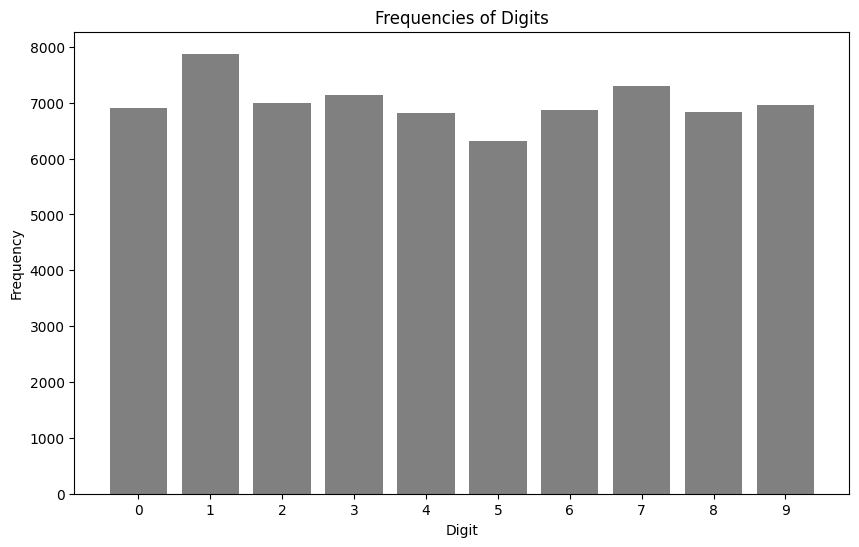

In [112]:
import numpy as np
# Count the occurrences of each digit (0-9)
unique, counts = np.unique(y, return_counts=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='grey')

# Add title and labels
plt.title('Frequencies of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
print("Unique elements:", unique)
print("Counts:", counts)
# Display the plot
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel_0 to target
dtypes: category(1), float64(784)
memory usage: 418.8 MB


# Split the data into train and test data

In [73]:
# Splitting the dataset into train set, test set and cross validation set using scikit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_test_final , X_check_final , y_test_final , y_check_final =train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Check for null values in the dataset. We do not find any.
print(X_train.isnull().sum())


pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


In [28]:
X.shape
# There are 70000 images in the dataset, and 784 columns for each row, implying that image data is not of shape (28,28) but 
# of (784,)

(70000, 784)

# MODEL TRAINING AND COMPILATION


In [74]:
# Using Tensorflow and keras for model  compilation and predicitions.
# I have used neural networks for this work.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# Compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1]),name='input_layer'),  # Hidden layer 1: 128 neurons, ReLU activation
    Dense(64, activation='relu',name='hidden_layer'),   # Hidden layer 2: 64 neurons, ReLU activation
    Dense(10, activation='softmax', name = ' output_layer') # Output layer: 10 neurons (one for each digit), softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_final, y_test_final)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 1.7670 - accuracy: 0.8522
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3227 - accuracy: 0.9187
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9400
Epoch 4/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.1789 - accuracy: 0.9507
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1522 - accuracy: 0.9575
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1311 - accuracy: 0.9630
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9677
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9695
Epoch 9/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0971 - accuracy: 0.9733
Epoch 10/10
350/350 [==============================] - 1s 3ms/step - loss: 0.1840 

In [104]:
model.summary()
model.get_weights()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[array([[-0.00663716, -0.05631994,  0.04287581, ..., -0.05593104,
          0.03790792, -0.03453395],
        [ 0.00761813, -0.02265828, -0.04476716, ..., -0.03206547,
         -0.02050438, -0.07435522],
        [ 0.02475886,  0.04715527,  0.06406637, ..., -0.05787874,
         -0.03670723, -0.03727917],
        ...,
        [-0.03912213, -0.07573172,  0.01590409, ..., -0.05281493,
         -0.0154117 , -0.03533782],
        [ 0.05299304,  0.05649681, -0.01125979, ..., -0.05177143,
         -0.08020504,  0.04018346],
        [ 0.02029044, -0.07081421,  0.02343576, ..., -0.03963267,
          0.07918438, -0.01452633]], dtype=float32),
 array([ 0.10891652, -0.01050421, -0.25126994, -0.0229634 , -0.14111324,
        -0.06321541,  0.12877893,  0.03798706, -0.00503646, -0.01155603,
        -0.12110709, -0.03269625,  0.04765915, -0.02190865, -0.07302936,
        -0.11982856, -0.24611063, -0.11456214,  0.1037057 , -0.05539278,
        -0.02141623, -0.05004926, -0.10592309, -0.02985185,  0.022

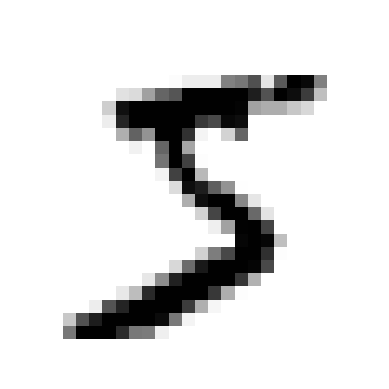

1/1 [==============================] - 0s 184ms/step
[5]


In [96]:

import numpy as np
import matplotlib.pyplot as plt


random_image = X_check_final.iloc[0]
random_image = some_digit.reshape(28, 28)
plt.imshow(random_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
# Reshape and preprocess the image for testing
random_image = random_image.reshape(1,784)  

# Make predictions
predicted_label = model.predict(random_image)
predicted_digit = np.argmax(predicted_label,axis=1)
print(predicted_digit)




# Confusion Matrix, model testing

88/88 [==============================] - 0s 3ms/step


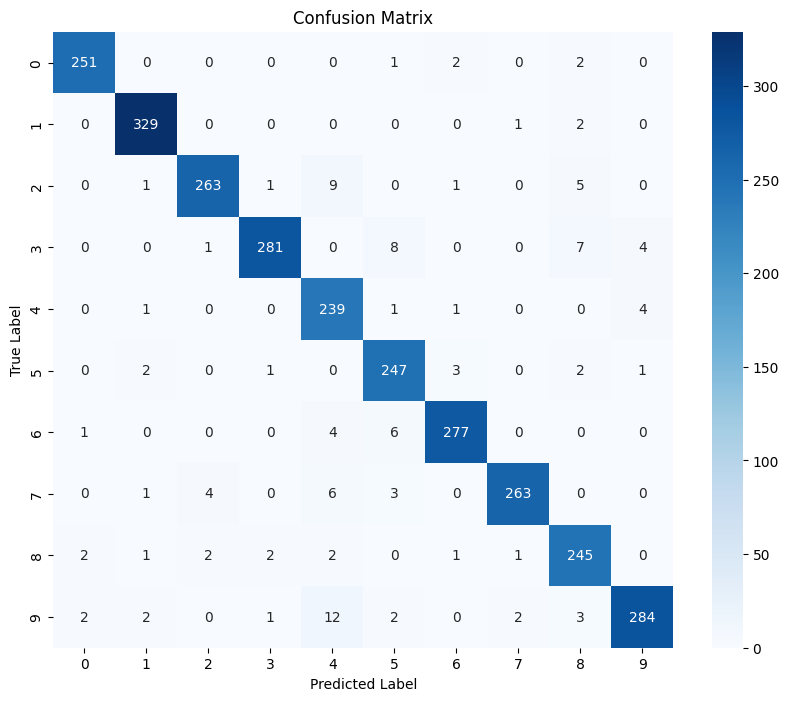

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       0.98      0.99      0.98       332
           2       0.97      0.94      0.96       280
           3       0.98      0.93      0.96       301
           4       0.88      0.97      0.92       246
           5       0.92      0.96      0.94       256
           6       0.97      0.96      0.97       288
           7       0.99      0.95      0.97       277
           8       0.92      0.96      0.94       256
           9       0.97      0.92      0.95       308

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

predicted_digit_labels = model.predict(X_check_final)
predicted_digit_prob = np.argmax(predicted_digit_labels,axis=1)

cm = confusion_matrix(y_check_final, predicted_digit_prob)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_check_final, predicted_digit_prob))


 SUMMARY 
  ACCURACY - 95.9 PERCENT
  TOTAL PARAMETERS USED IN THE NEURAL NETWORK : 109386 (All trainable)